## House Princing

**The goal of this project is to develop a housing pricing tool designed for a real estate company - House Rocket**

- Which houses should the CEO of House Rocket buy and at what purchase price?

- Once the house is owned by the company, when is the best time to sell them and what would be the selling price?

 - Should House Rocket renovate to increase the selling price? What would be the suggested changes? What is the price increase given by each renovation option?

## In this project we're exploring various aspects related to the housing market, such as:

### Trends Over Time
- How has the median home price changed over the months?
- Are there any seasonal trends in home prices?
- How do the number of sales fluctuate over time?

### Property Characteristics
- What is the distribution of the number of bedrooms and bathrooms?
- Is there a correlation between the size of the living space (sqft_living) and the price of the home?
- How does the condition of the property (condition) affect its price?

### Location Analysis
- Are certain zip codes associated with higher property prices?
- Is there a relationship between waterfront properties and their prices?
- How do latitude and longitude relate to property prices?

### Feature Importance
- Which features (e.g., number of bedrooms, square footage) have the most significant impact on home prices?
- Can we predict home prices using a machine learning model, and if so, which features are the most important predictors?

### Neighborhood Comparison
- How does the average property size (sqft_living) in a given neighborhood compare to neighboring areas?
- Is there a significant difference in property prices between different neighborhoods?

### Renovation and Age
- How does the year of renovation (yr_renovated) impact property prices?
- Do newer homes tend to sell for higher prices compared to older homes?

### Comparing Living Spaces
- How does the size of living space (sqft_living) compare to the average size of living spaces for the nearest 15 neighbors (sqft_living15)?
- Is there a correlation between the size of the living space and the size of the lot (sqft_lot)?

By analyzing these aspects of the dataset, you can gain insights into various factors influencing housing prices and make informed decisions in real estate investment or market analysis.


## Column definitions

**This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.**

- **id**: Unique ID for each home sold
- **date**: Date of the home sale
- **price**: Price of each home sold
- **bedrooms**: Number of bedrooms
- **bathrooms**: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- **sqft_living**: Square footage of the apartment's interior living space
- **sqft_lot**: Square footage of the land space
- **floors**: Number of floors
- **waterfront**: A dummy variable for whether the apartment was overlooking the waterfront or not
- **view**: An index from 0 to 4 of how good the view of the property was
- **condition**: An index from 1 to 5 on the condition of the apartment
- **grade**: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design
- **sqft_above**: The square footage of the interior housing space that is above ground level
- **sqft_basement**: The square footage of the interior housing space that is below ground level
- **yr_built**: The year the house was initially built
- **yr_renovated**: The year of the house’s last renovation
- **zipcode**: What zipcode area the house is in
- **lat**: Latitude
- **long**: Longitude
- **sqft_living15**: The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors


In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
df = pd.read_csv('kc_house_data.csv')

In [81]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [83]:
# date type correction
df['full_date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['date_year_month_sale'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S').dt.strftime('%b-%Y')

In [84]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,full_date
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014-10-29 04:38:01.959931648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014-05-02 00:00:00
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014-07-22 00:00:00
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014-10-16 00:00:00
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015-02-17 00:00:00
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015-05-27 00:00:00
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,NaN


<Axes: >

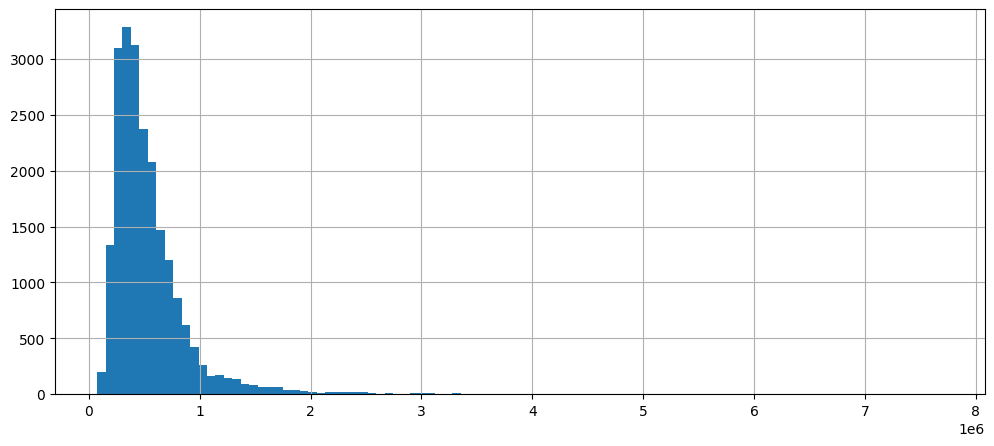

In [85]:
plt.figure(figsize=(12,5))
df['price'].hist(bins= 100)

In [86]:
quartile_75 = df['price'].quantile(0.75)
print(quartile_75)

645000.0


- The majority of the values are in the range of 650,000

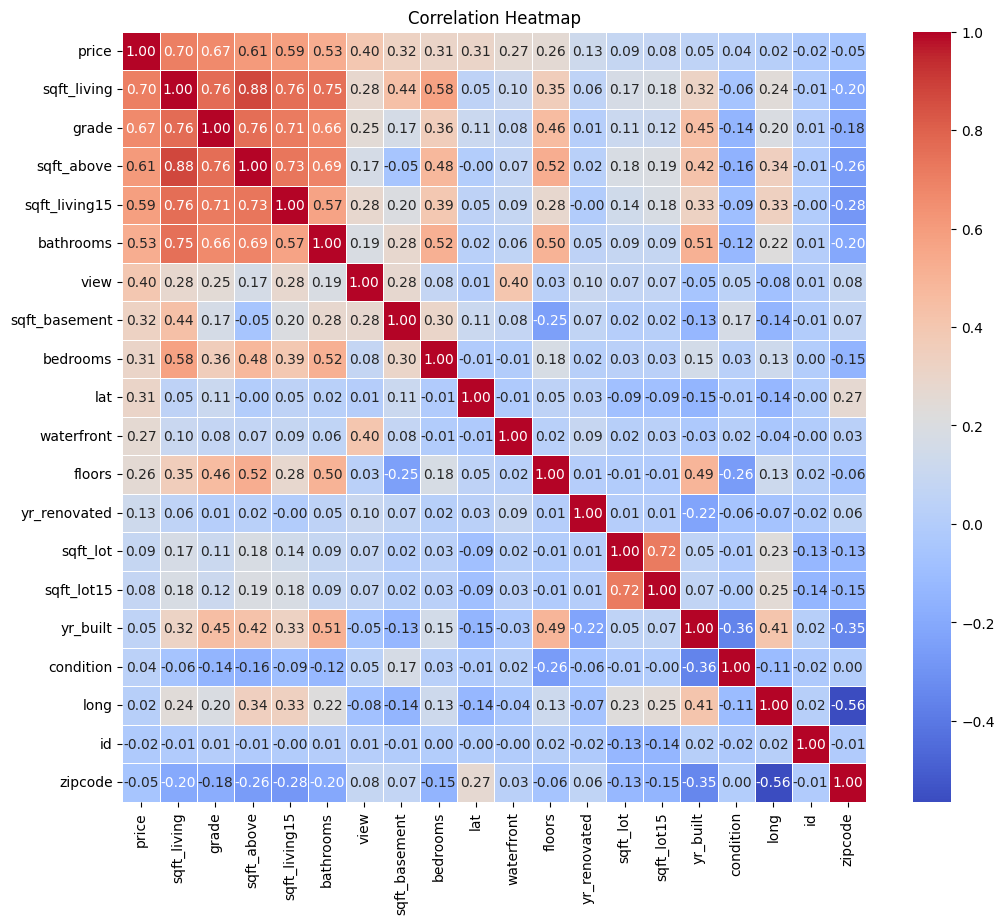

In [103]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation Matrix
correlation_matrix = numeric_columns.corr()

# Classificar pela correlação com 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Filter only the most correlated columns with 'price'
relevant_columns = price_correlation.index.tolist()

# Create a new DataFrame containing only the relevant columns
df_filtered = df[relevant_columns]

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

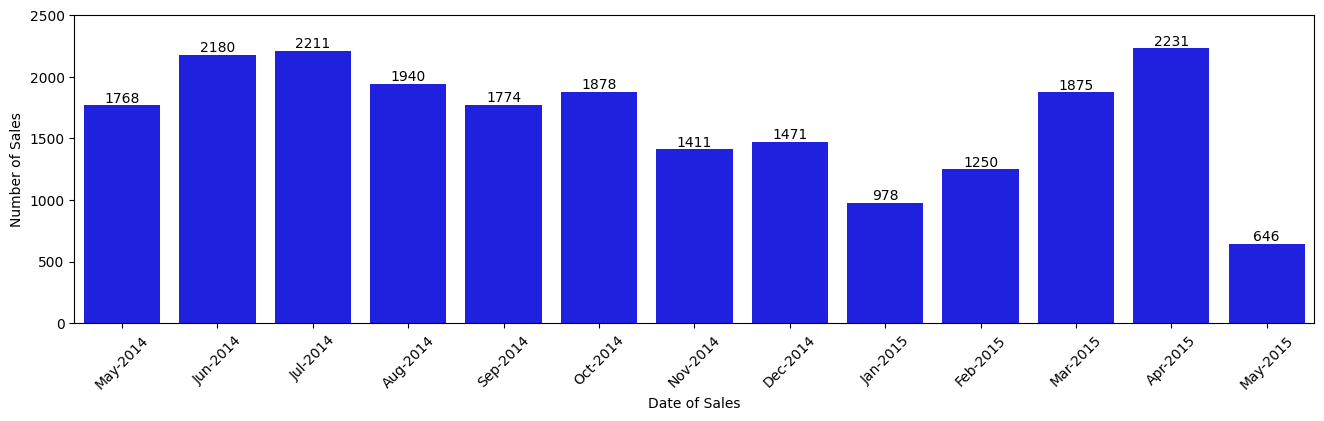

In [87]:
# Grouping and aggregating data
df_filtered = df.value_counts('date_year_month_sale').reset_index()
count_column_name = (df_filtered.columns)[1]
df_filtered.rename(columns={count_column_name: 'Total_Houses_Sold'}, inplace=True)
df_filtered['date'] = pd.to_datetime(df_filtered['date_year_month_sale'], format='%b-%Y')
df_filtered = df_filtered.sort_values('date', ascending=True)

# Plotting
plt.figure(figsize=(16, 4))
ax = sns.barplot(x = 'date_year_month_sale', y='Total_Houses_Sold', color = 'b' , data = df_filtered)
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', color='black', fontsize=10)
plt.xticks(rotation=45) 
plt.xlabel('Date of Sales')
plt.ylabel('Number of Sales')
plt.ylim(0,2500)
plt.show()



C:\Users\Lucas\AppData\Local\Temp\ipykernel_22556\2231796949.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date_year_month_sale', y='price', data=df_filtered, ci=None, marker='o', sort = False)


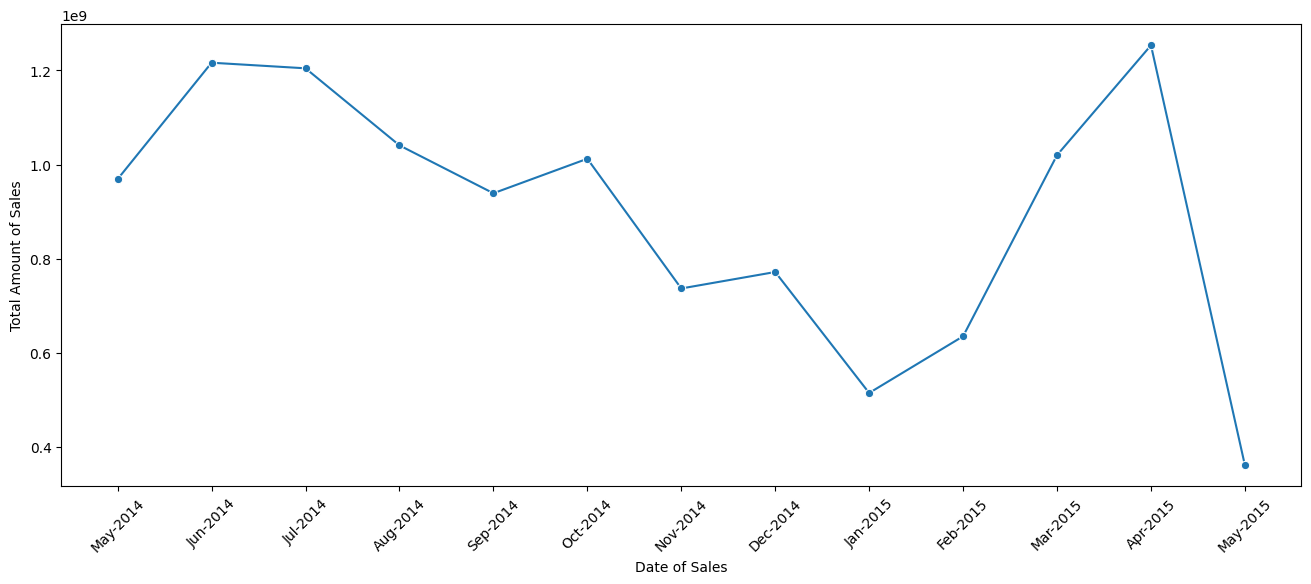

In [88]:
# Grouping and aggregating data
df_filtered = df.groupby('date_year_month_sale')['price'].sum().reset_index()
df_filtered['date'] = pd.to_datetime(df_filtered['date_year_month_sale'], format='%b-%Y')
df_filtered = df_filtered.sort_values('date', ascending=True)

# Plotting
plt.figure(figsize=(16, 6))
sns.lineplot(x='date_year_month_sale', y='price', data=df_filtered, ci=None, marker='o', sort = False)
plt.xticks(rotation=45) 
plt.xlabel('Date of Sales')
plt.ylabel('Total Amount of Sales')
plt.show()


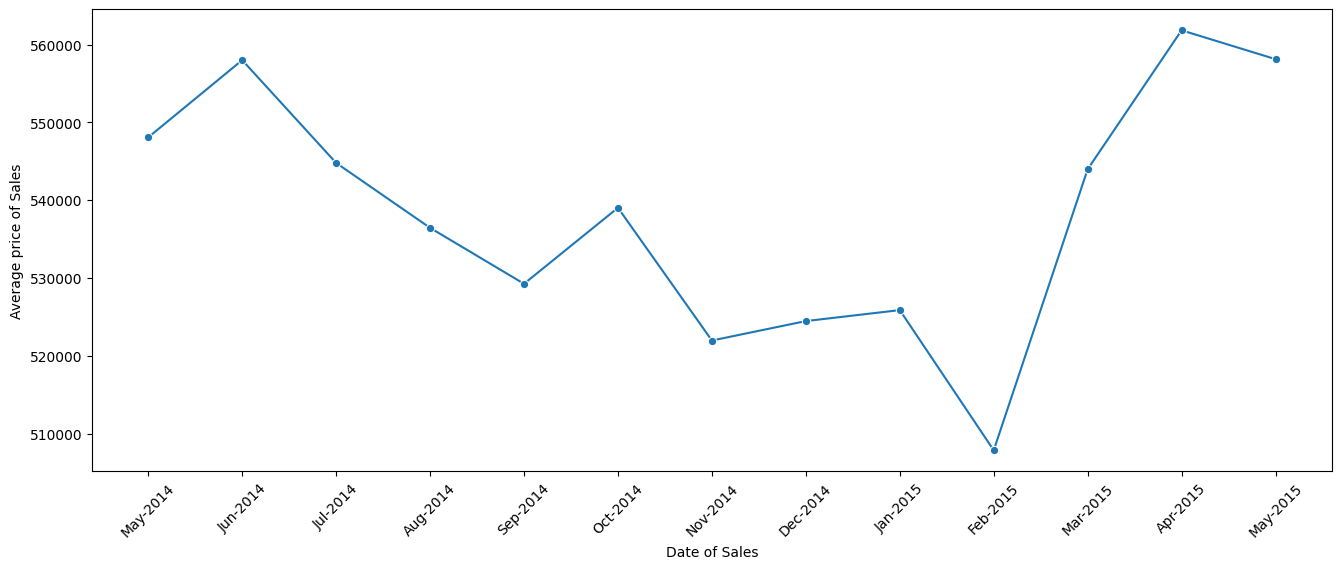

In [89]:
# Grouping and aggregating data
df_filtered = df.groupby('date_year_month_sale')['price'].mean().reset_index()
df_filtered['date'] = pd.to_datetime(df_filtered['date_year_month_sale'], format='%b-%Y')
df_filtered = df_filtered.sort_values('date', ascending=True)

# Plotting
plt.figure(figsize=(16, 6))
sns.lineplot(x='date_year_month_sale', y='price', data=df_filtered, errorbar=None, marker='o', sort = False)
plt.xticks(rotation=45) 
plt.xlabel('Date of Sales')
plt.ylabel('Average price of Sales')
plt.show()


- The months with the smallest quantity of houses sold were May 2015, Jan 2015, and Feb 2015 respectively.
- In terms of mean price, February 2015 had the smallest value, despite having more units sold than January 2015. This indicates that the houses sold in January 2015 were more expensive. Similarly, May had one of the highest mean prices, suggesting expensive houses, but the low quantity of houses sold resulted in a low total sum for that month as well.
- The best month was April 2015, both in terms of the quantity of houses sold and the total amount generated.


<Axes: xlabel='yr_built'>

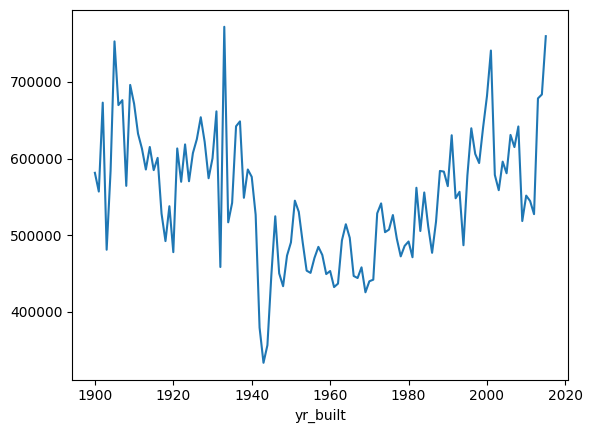

In [115]:
df.groupby('yr_built')['price'].mean().plot()

In [122]:
df.groupby('yr_built')['price'].mean().reset_index().sort_values('price', ascending=True).head(20)

,yr_built,price
43,1943,333373.470588
44,1944,356322.078571
42,1942,379290.497758
69,1969,425408.592857
61,1961,432213.071429
48,1948,433351.391489
62,1962,436715.314103
70,1970,439783.878788
71,1971,441878.423077
67,1967,444026.745714


- Its evident that there's an anomally between 1942 and 1944, and probably it's related to the world war, and the period that the US entered in the war. For example: Houses built poorly or with not a good structure due to the war
- Besides that, we can see that  after 1960 it starts to rise, so the year built shoult be devided in 2 periods, before 1960 and after

In [125]:
# Create a new column 'year_built_class' based on the condition or 2 parts dataset.Before 1960 and after
df['year_built_class'] = pd.cut(df['yr_built'], bins=[-float('inf'), 1960, float('inf')], labels=['before_1960', 'after_1960'])

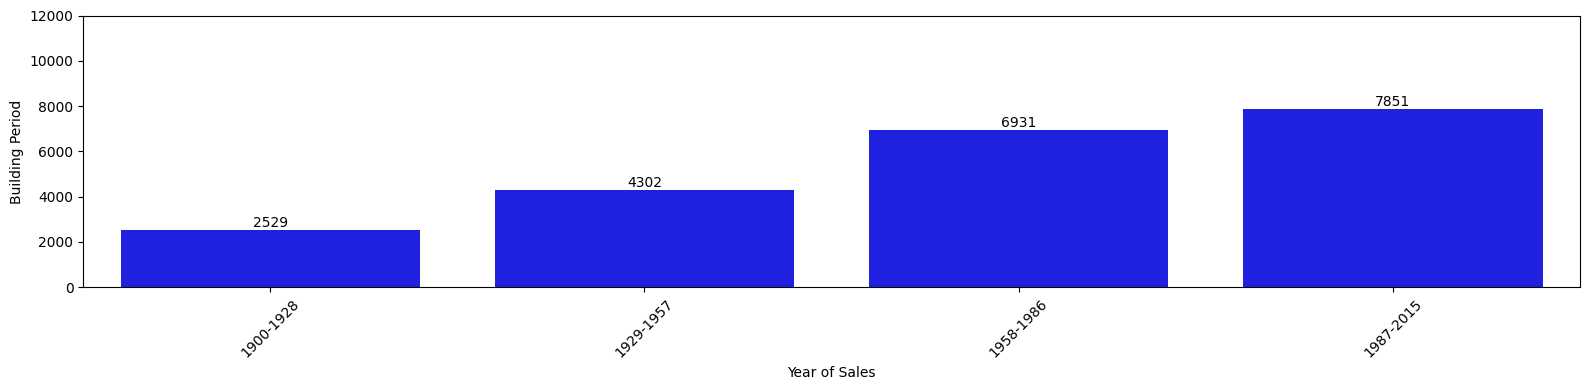

In [155]:
# Grouping and aggregating data

# There are 116 different 'yr_built, so we are going to divise the year in 4 bins of 29 years each'

# Create the boundaries of the classes
limits = [x for x in range(1900, 2025, 29)]

# Create the labels for the classes
labels = [f'{limits[i]}-{limits[i+1]-1}' for i in range(len(limits)-1)]

# Add a new column with the classes
df['year_built_class'] = pd.cut(df['yr_built'], bins=limits, labels=labels, right=False)


df_filtered = df['year_built_class'].value_counts().reset_index()
df_filtered.sort_values('year_built_class', ascending=True)
count_column_name = (df_filtered.columns)[1]
df_filtered.rename(columns={count_column_name: 'Total_Houses_Sold'}, inplace=True)


# Plotting
plt.figure(figsize=(16, 4))
ax = sns.barplot(x = 'year_built_class', y='Total_Houses_Sold', color = 'b' , data = df_filtered)
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', color='black', fontsize=10)
plt.xticks(rotation=45) 
plt.xlabel('Year of Sales')
plt.ylabel('Building Period')
plt.ylim(0,12000)
plt.tight_layout()
plt.show()




 - It can be inferred that over the years, the number of constructions in the region increased, which is why it's more common to have more sales of constructions built after 1960.

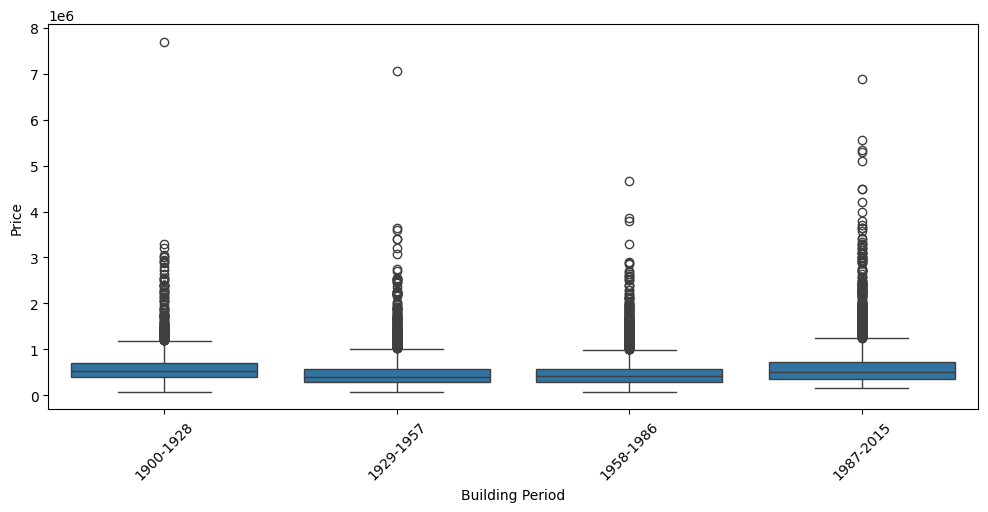

In [156]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='year_built_class', y='price', data=df)
plt.xticks(rotation=45) 
plt.xlabel('Building Period')
plt.ylabel('Price')
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_22556\1914240411.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered = df.groupby('year_built_class')['price'].mean().reset_index()


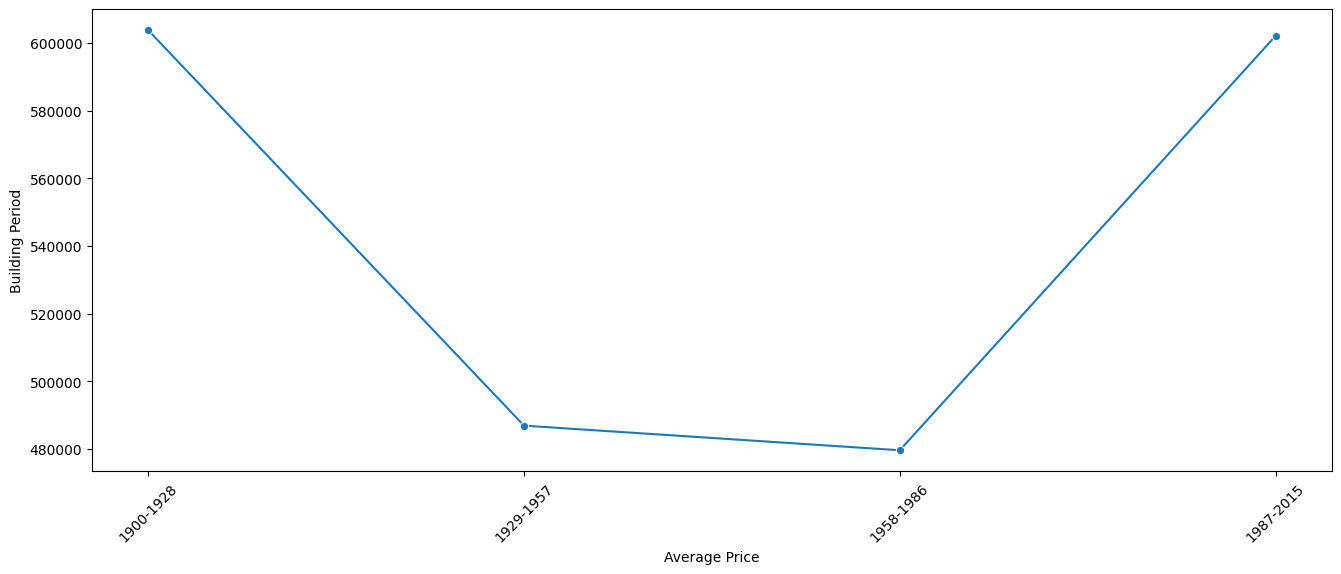

In [157]:
# Grouping and aggregating data
df_filtered = df.groupby('year_built_class')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(16, 6))
sns.lineplot(x='year_built_class', y='price', data=df_filtered, errorbar=None, marker='o', sort = False)
plt.xticks(rotation=45) 
plt.xlabel('Average Price')
plt.ylabel('Building Period')
plt.show()

 - It's evident that even when grouped by periods, the majority of houses have a value lower than 1 million.
 - The most expensive houses were built before 1929 and after 1986.

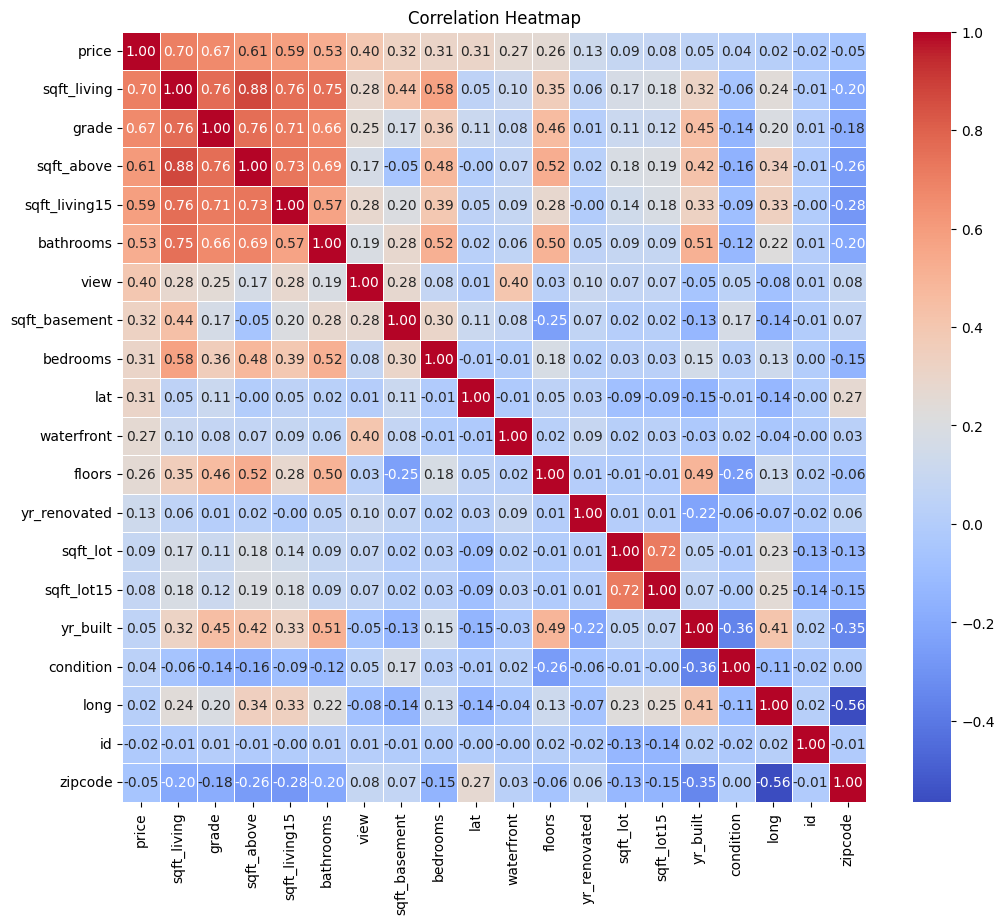